<h1> A sales prediction model for a retail store </h1>

In [2]:
# load lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the data
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<h2> Data Cleaning </h2>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
# check null values or missing values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

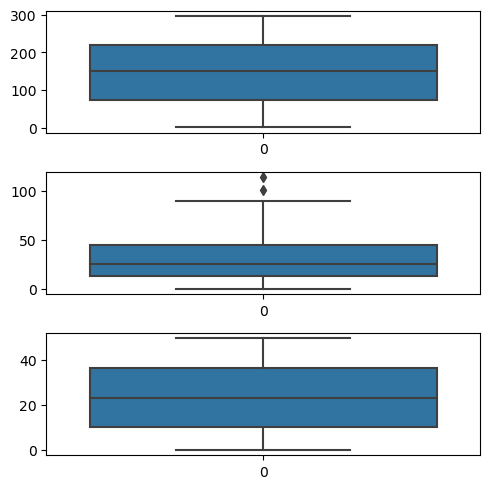

In [9]:
# check for outliers
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'],ax=axs[2])
plt.tight_layout()

<h4> Conclusion: </h4>
<p> The data is clean and ready for analysis</p>

<h3> Exploratory Data Analysis </h3>

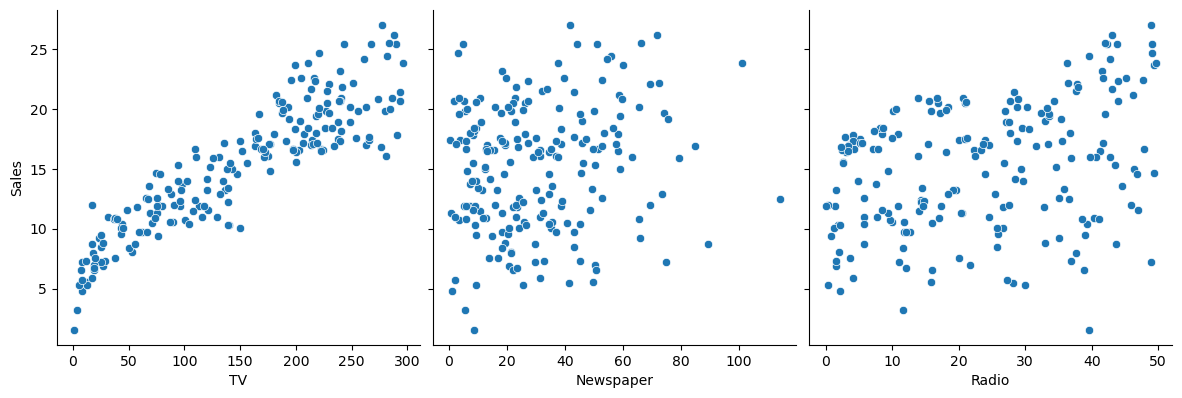

In [10]:
# find the realtion between the vars and sales
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

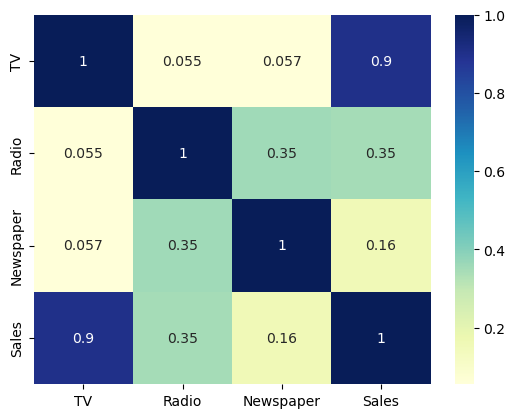

In [11]:
# the correlation between the variables
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

<h4> Conclusion: </h4>
<p> TV is the most effective advertising medium, followed by radio and newspaper. </p>

In [20]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X = df['TV']
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)
X_test.shape == y_test.shape and X_train.shape == y_train.shape

True

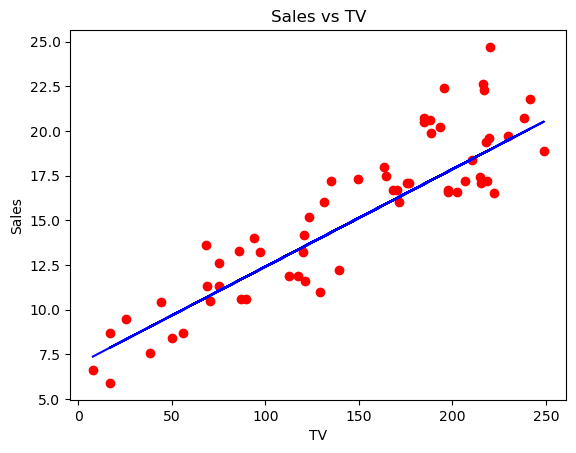

In [21]:
# create the pipeline for the linear regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline([('scaler', StandardScaler()), ('regression', LinearRegression())])

# fit the model
pipeline.fit(X_train.values.reshape(-1,1), y_train)

# predict the model
y_pred = pipeline.predict(X_test.values.reshape(-1,1))

# check the accuracy of the model
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

# plot the model

plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('Sales vs TV')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()



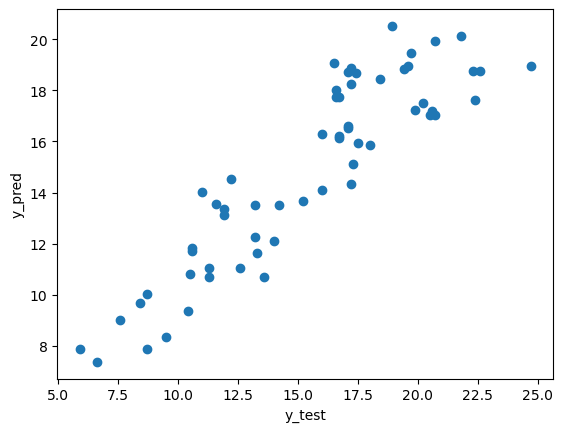

In [22]:
# residual plot
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()